In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
np.set_printoptions(suppress=True)
from tqdm import tqdm

In [2]:
images = h5py.File("../../../../../Data/20230406_N2_1_nobg_xyzsliced_downsampled.h5",'r+')
sumarray=np.load("../combinewormtracks/sumarray.npy")

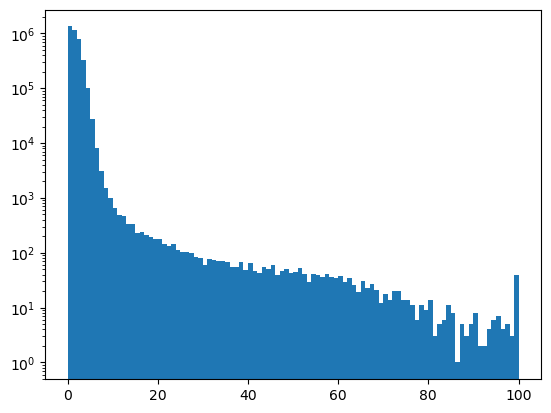

In [113]:
plt.hist(np.clip(img.flatten(),0,100),bins=100)
plt.yscale("log")

<Figure size 1500x1500 with 0 Axes>

In [ ]:
fig=plt.figure(figsize=(15,15))
thresh=20
img=images["0"]['frame'][0].max(2)-sumarray/max(np.asarray(list(images.keys()))[:-1].astype(int))
img=np.vectorize(lambda x: 0 if x <thresh else 1)(img)
img=img*255
img=np.array(img, np.uint8)
#imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY) 

# Detecting contours in image. 
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, 1)

#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
#save image
cv2.imwrite(r'C:\Users\rafae\OneDrive\Documents\Coding\worms\combinewormtracks\test.png',img_contours) 
plt.imsave(r'C:\Users\rafae\OneDrive\Documents\Coding\worms\combinewormtracks\testplt.png',img)
#plt.colorbar()

In [143]:
np.max([int(num) for num in images.keys() if num.isdigit()])

4311

In [58]:
thresh=20
img=images["0"]['frame'][0].max(2)-sumarray/np.max(keys)
img=np.vectorize(lambda x: 0 if x <20 else 1)(img)
img=np.array(img*255, np.uint8)
img=np.flip(img,axis=0)
#plt.imshow(img,cmap='Greys')
ID=1
frame0=np.zeros((1,4),dtype=float)

_, threshold = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY) 
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, 1)

for cnt in contours:
    if len(cnt)>25:
        x,y=np.average(cnt[:,0],axis=0)
        frame0=np.vstack([frame0,[ID,0,x,y]])
        ID+=1
frame0=frame0[1:]
tracks=frame0

maxID=np.max(frame0[:,0])
print(maxID)

for frame in tqdm(range(1,200)):#np.max([int(num) for num in images.keys() if num.isdigit()]))):
    thresh=20
    img=images[str(frame)]['frame'][0].max(2)-sumarray/np.max(keys)
    img=np.vectorize(lambda x: 0 if x <20 else 1)(img)
    img=np.array(img*255, np.uint8)
    img=np.flip(img,axis=0)
    #plt.imshow(img,cmap='Greys')
    ID=1
    frame1=np.zeros((1,4),dtype=float)

    _, threshold = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY) 
    contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, 1)

    for cnt in contours:
        if len(cnt)>25:
            x,y=np.average(cnt[:,0],axis=0)
            frame1=np.vstack([frame1,[ID,frame,x,y]])
            ID+=1
    frame1=frame1[1:]
    
    threshold = 20
    
    claimed = []
    for i in range(len(frame0)):
        candidates = []
        distances = []
        for j in range(len(frame1)):
            if j in claimed:
                continue
            distance = (frame1[j][2]-frame0[i][2])**2 + (frame1[j][3]-frame0[i][3])**2
            if distance < threshold**2:
                candidates.append(j)
                distances.append(distance)
        if len(candidates) > 0:
            closest = np.argmin(distances)
            frame1[candidates[closest]][0] = frame0[i][0]
            claimed.append(candidates[closest])

    newidindex=1
    for i in range(len(frame1)):
        if i not in claimed:
            maxID+=1
            frame1[i][0] = maxID
    tracks=np.concatenate([tracks,frame1])
    
    frame0=frame1

4.0
time: 78
[12.0, 5.0]
time: 79
[12.0, 5.0]
time: 80
[12.0, 5.0]
time: 81
[12.0, 5.0]
time: 82
[12.0, 5.0]
time: 83
[12.0, 5.0]
time: 84
[12.0, 5.0]
time: 85
[9.0, 5.0]
time: 86
[9.0, 5.0]
time: 87
[12.0, 5.0]
time: 88
[9.0, 5.0]
time: 89
[12.0]
time: 90
[12.0]
time: 91
[12.0]
time: 92
[12.0]
time: 93
[12.0]
time: 94
[11.0]
time: 95
[12.0]
time: 96
[12.0]
time: 97
[12.0]
time: 98
[12.0]
time: 99
[5.0]
time: 100
[12.0]
time: 101
[12.0]
time: 102
[12.0]
time: 103
[12.0]
time: 104
[12.0]
time: 105
[]
time: 121
[18.0]
time: 122
[18.0]
time: 123
[18.0, 4.0]
time: 124
[]


In [60]:
tracksdf=pd.DataFrame(tracks,columns = ['ID','time','x','y'])

In [152]:
tracksdf.to_csv("newalgorithm.csv")

In [3]:
tracksdf=pd.read_csv("newalgorithm.csv")

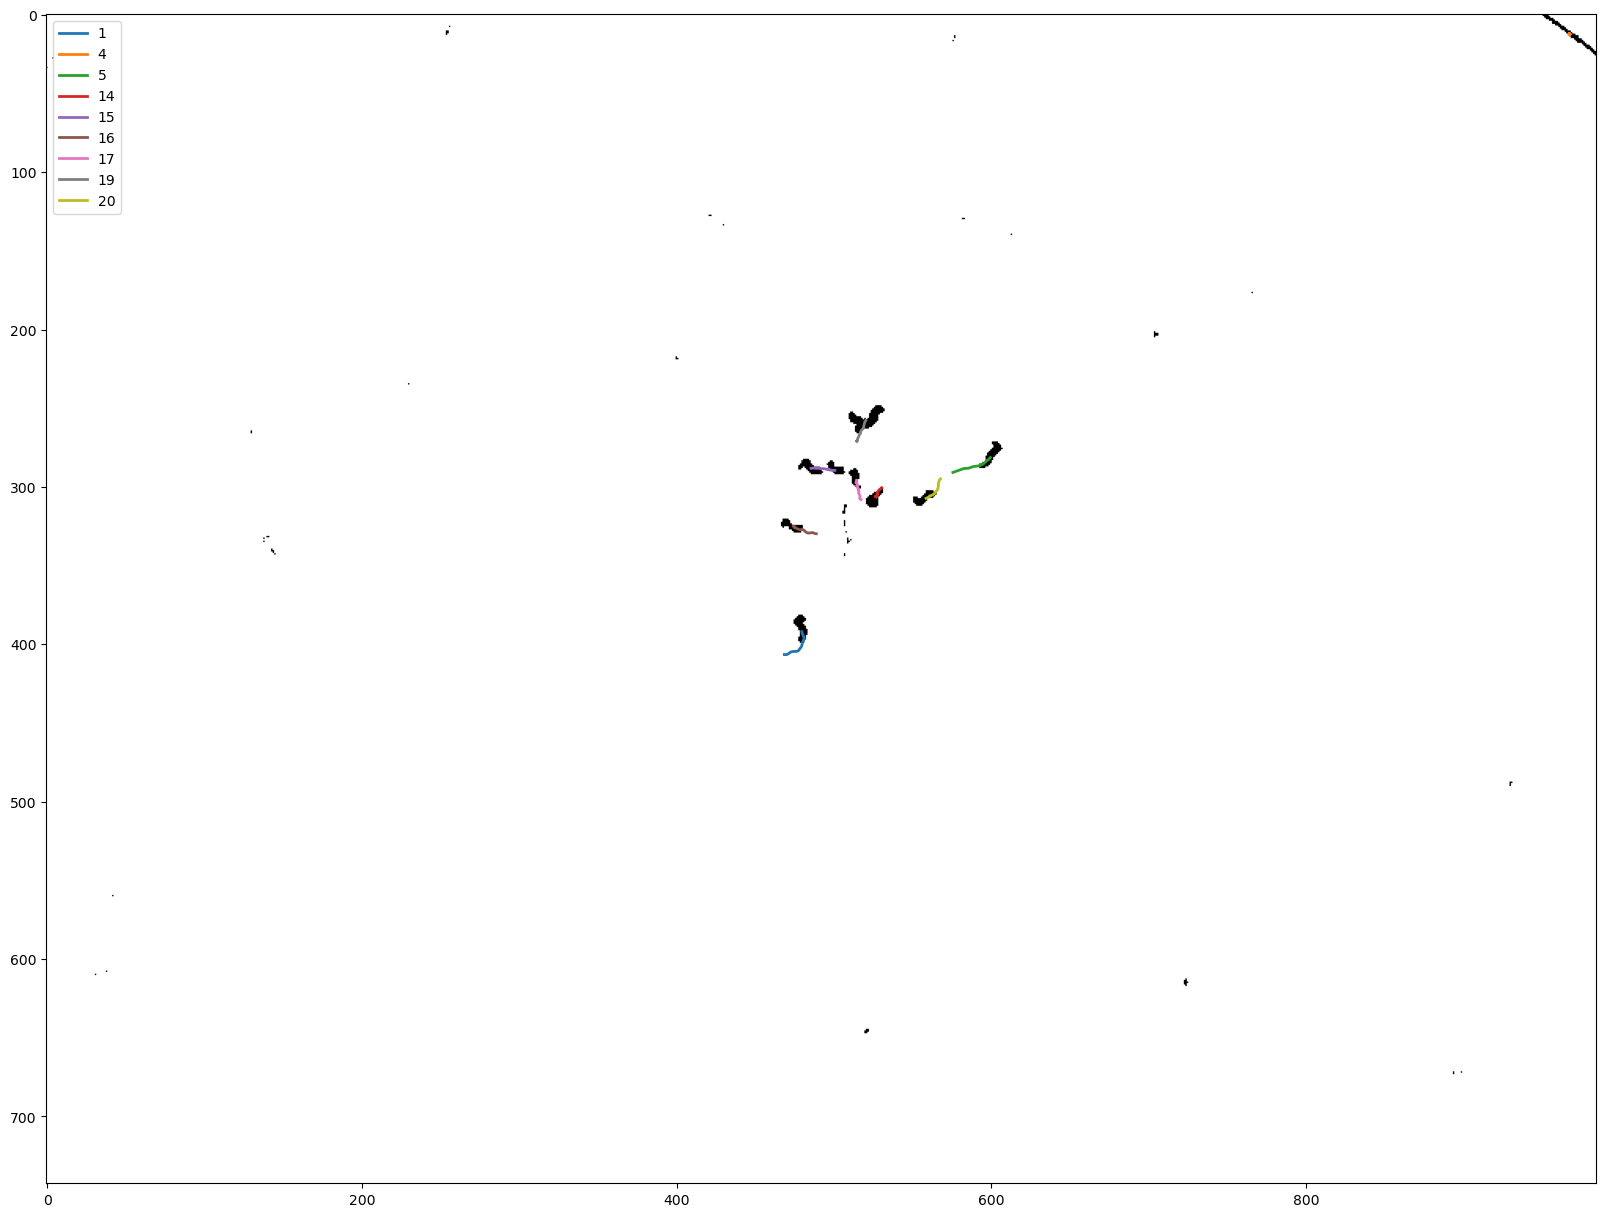

In [63]:
maxtime=143
mintime=125

f=plt.figure(figsize=(20,20))
img=images[str(maxtime)]['frame'][0].max(2)-sumarray/np.max(keys)
img=np.vectorize(lambda x: 0 if x <20 else 1)(img)
img=np.array(img*255, np.uint8)
img=np.flip(img,axis=0)
plt.imshow(img,cmap='Greys')
for ID in np.unique(tracksdf.ID.values):
    if len(tracksdf[(tracksdf.ID==ID)&(tracksdf.time<maxtime)&(tracksdf.time>mintime)].x.values)>0:
        plt.plot(tracksdf[(tracksdf.ID==ID)&(tracksdf.time<maxtime)&(tracksdf.time>mintime)].x.values,
                 tracksdf[(tracksdf.ID==ID)&(tracksdf.time<maxtime)&(tracksdf.time>mintime)].y.values,
                 label=int(ID),linewidth=2)
plt.legend()

In [127]:
tracksdf[tracksdf.ID==33]

,ID,time,x,y
37,33.0,1.0,837.764706,1461.382353
259,33.0,8.0,622.652174,1252.043478
291,33.0,9.0,620.854839,1255.225806


In [53]:
thresh=20
img=images["1"]['frame'][0].max(2)-sumarray/max(np.asarray(list(images.keys()))[:-1].astype(int))
img=np.vectorize(lambda x: 0 if x <20 else 1)(img)
img=np.array(img*255, np.uint8)
#plt.imshow(img,cmap='Greys')
ID=1
frame1=np.zeros((1,4),dtype=float)

_, threshold = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY) 
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, 1)

for cnt in contours:
    if len(cnt)>25:
        x,y=np.average(cnt[:,0],axis=0)
        frame1=np.vstack([frame1,[ID,1,x,y]])
        ID+=1
frame1=frame1[1:]
tracksdf1=pd.DataFrame(frame1[1:],columns = ['ID','time','x','y'])
np.savetxt("1new.csv", np.asarray(tracksdf))

In [60]:
threshold = 20
    
claimed = []
for i in range(len(frame0)):
    candidates = []
    for j in range(len(frame1)):
        if j in claimed:
            continue
        distance = (frame1[j][2]-frame0[i][2])**2 + (frame1[j][3]-frame0[i][3])**2
        if distance < threshold**2:
            candidates.append(j)
    if len(candidates) == 0:
        print("No cand " + str(i))
    else:
        closest = np.argmin(candidates)
        frame1[candidates[closest]][0] = frame0[i][0]
        claimed.append(candidates[closest])

newidindex=1
for i in range(len(frame1)):
    if i not in claimed:
        print(i)
        frame1[i][0] = np.max(frame0[:,0])+newidindex
        newidindex+=1

No cand 17
No cand 31
5


In [61]:
frame0

array([[   1.        ,    0.        ,  605.80555556, 1909.66666667],
       [   2.        ,    0.        ,  921.83333333, 1886.03333333],
       [   3.        ,    0.        ,  865.31818182, 1870.27272727],
       [   4.        ,    0.        ,  582.71641791, 1591.47761194],
       [   5.        ,    0.        , 1089.16949153, 1511.69491525],
       [   6.        ,    0.        , 1220.57894737, 1352.49122807],
       [   7.        ,    0.        ,  766.69642857, 1311.80357143],
       [   8.        ,    0.        ,  586.        , 1267.25490196],
       [   9.        ,    0.        ,  959.5862069 , 1258.34482759],
       [  10.        ,    0.        ,  910.18367347, 1237.18367347],
       [  11.        ,    0.        ,  626.09230769, 1232.27692308],
       [  12.        ,    0.        ,  780.58536585, 1221.36585366],
       [  13.        ,    0.        ,  741.94230769, 1215.44230769],
       [  14.        ,    0.        ,  823.32142857, 1198.10714286],
       [  15.        ,    0.      

In [63]:
frame1

array([[   1.        ,    1.        ,  605.80555556, 1909.66666667],
       [   2.        ,    1.        ,  922.35      , 1884.06666667],
       [   3.        ,    1.        ,  864.19148936, 1871.31914894],
       [   4.        ,    1.        ,  583.47826087, 1590.49275362],
       [   5.        ,    1.        , 1090.25862069, 1513.44827586],
       [  33.        ,    1.        ,  837.76470588, 1461.38235294],
       [   6.        ,    1.        , 1219.63636364, 1352.4       ],
       [   7.        ,    1.        ,  765.54385965, 1310.77192982],
       [   8.        ,    1.        ,  587.12      , 1268.98      ],
       [   9.        ,    1.        ,  958.96551724, 1257.72413793],
       [  10.        ,    1.        ,  911.11111111, 1237.2962963 ],
       [  11.        ,    1.        ,  626.28787879, 1236.46969697],
       [  12.        ,    1.        ,  780.11904762, 1222.0952381 ],
       [  13.        ,    1.        ,  742.12765957, 1215.27659574],
       [  14.        ,    1.      

In [34]:
nocombind=1
claimed=[]
for i in frame1:
    poss=[]
    for j in frame0:
        dist=np.sqrt((i[2]-j[2])**2+(i[3]-j[3])**2)
        if dist==5:
            poss.append(j)
    if len(poss)==0:
        frame1[i,1]=np.max(frame0[:,1])+nocombind
    for possibility in poss:
        

SyntaxError: incomplete input (954786643.py, line 11)

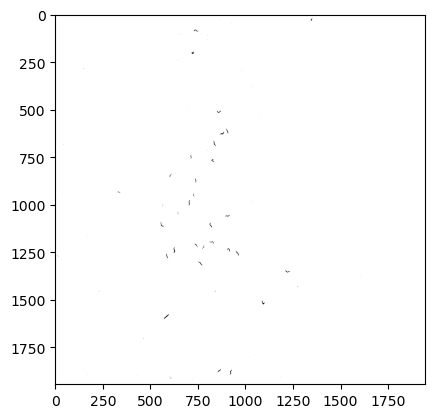

In [178]:
img=images["2"]['frame'][0].max(2)-sumarray/max(np.asarray(list(images.keys()))[:-1].astype(int)) #l
img=np.vectorize(lambda x: 0 if x <20 else 1)(img)
img=np.array(img*255, np.uint8)
#plt.imshow(img,cmap='Greys')
frame=np.zeros((1,4),dtype=float)

_, threshold = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY) 
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, 1)


for cnt in contours:
    if len(cnt)>25:
        #gets the x and y coords
        x,y=np.average(cnt[:,0],axis=0)
        #gets a version of tracksdf with time=0
        tracks0=tracksdf[tracksdf.time==0]
        #makes a distance column
        tracks0['distance'] = np.sqrt((tracks0['x']-x)**2+(tracks0['y']-y)**2)
        #sets the ID to the minimum track
        ID=tracks0[tracks0.distance==np.min(tracks0.distance.values)].ID.values[0]
        frame=np.vstack([frame,[ID,2,x,y]])
        
t=pd.concat([tracksdf,pd.DataFrame(frame[1:],columns = ['ID','time','x','y'])],ignore_index=True)

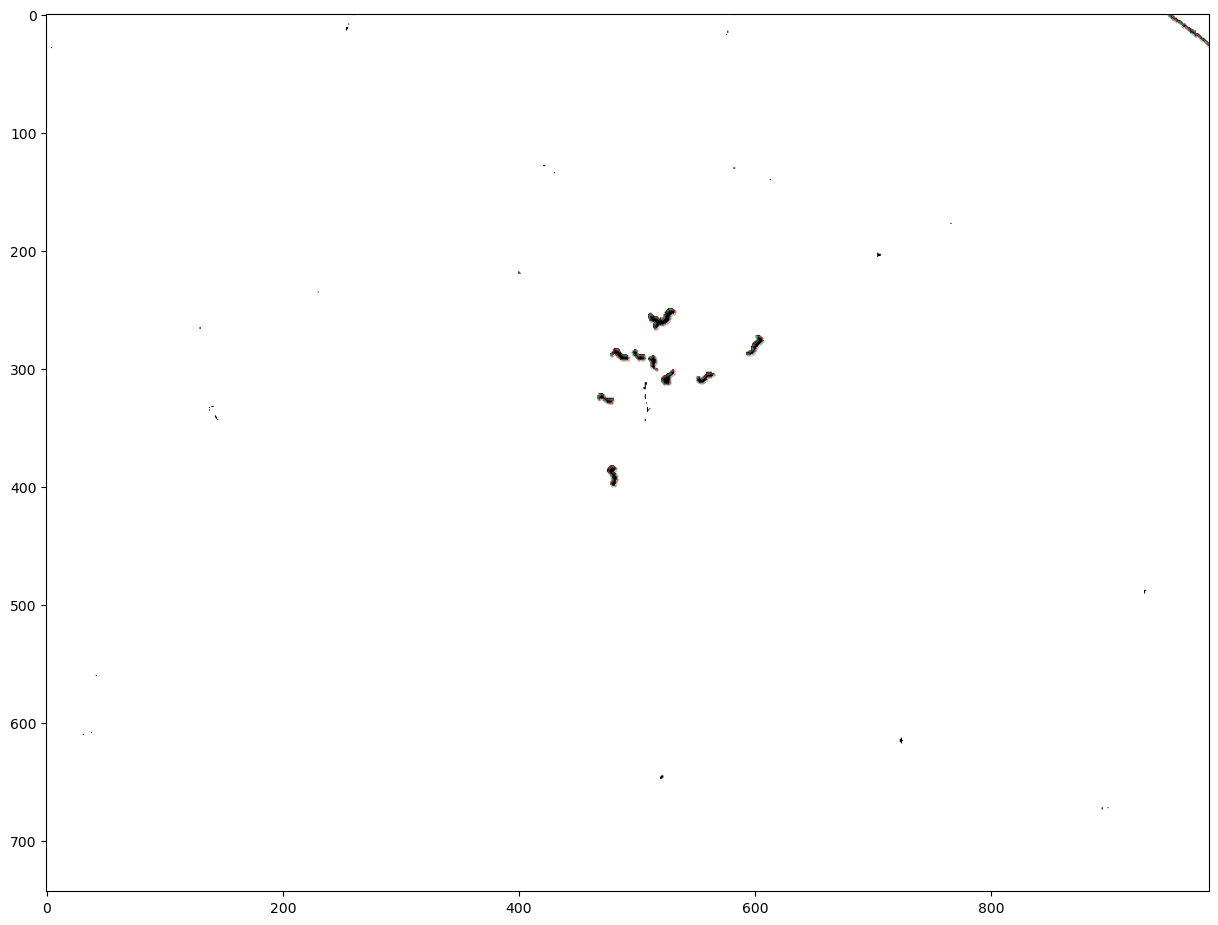

In [57]:
fig=plt.figure(figsize=(15,15))
thresh=20
img=images["143"]['frame'][0].max(2)-sumarray/np.max(keys)
img=np.vectorize(lambda x: 0 if x <thresh else 1)(img)
img=np.flip(img,axis=0)*255
img=np.array(img, np.uint8)
#imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY) 

# Detecting contours in image. 
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, 1)
plt.imshow(img,cmap='Greys')
for cnt in contours:
    if len(cnt)>25:
        for point in cnt:
            plt.scatter(point[0,0],point[0,1],s=0.1)

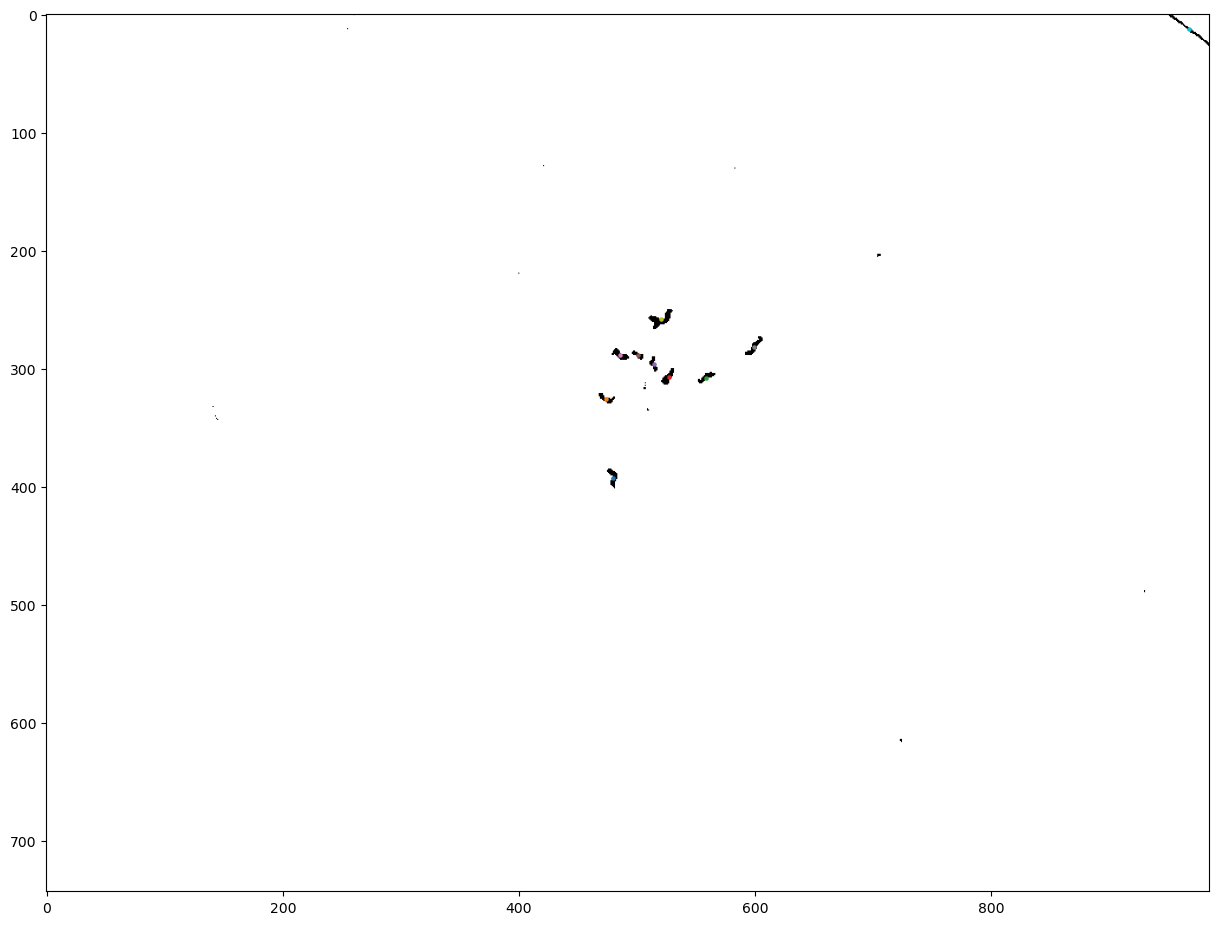

In [65]:
fig=plt.figure(figsize=(15,15))
img=images["142"]['frame'][0].max(2)-sumarray/np.max(keys)
img=np.vectorize(lambda x: 0 if x <30 else 1)(img)
img=np.flip(img,axis=0)*255
img=np.array(img, np.uint8)
plt.imshow(img,cmap='Greys')
_, threshold = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY) 

# Detecting contours in image. 
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, 1)
for cnt in contours:
    if len(cnt)>15:
        x,y=np.average(cnt[:,0],axis=0)
        plt.scatter(x,y,s=5)

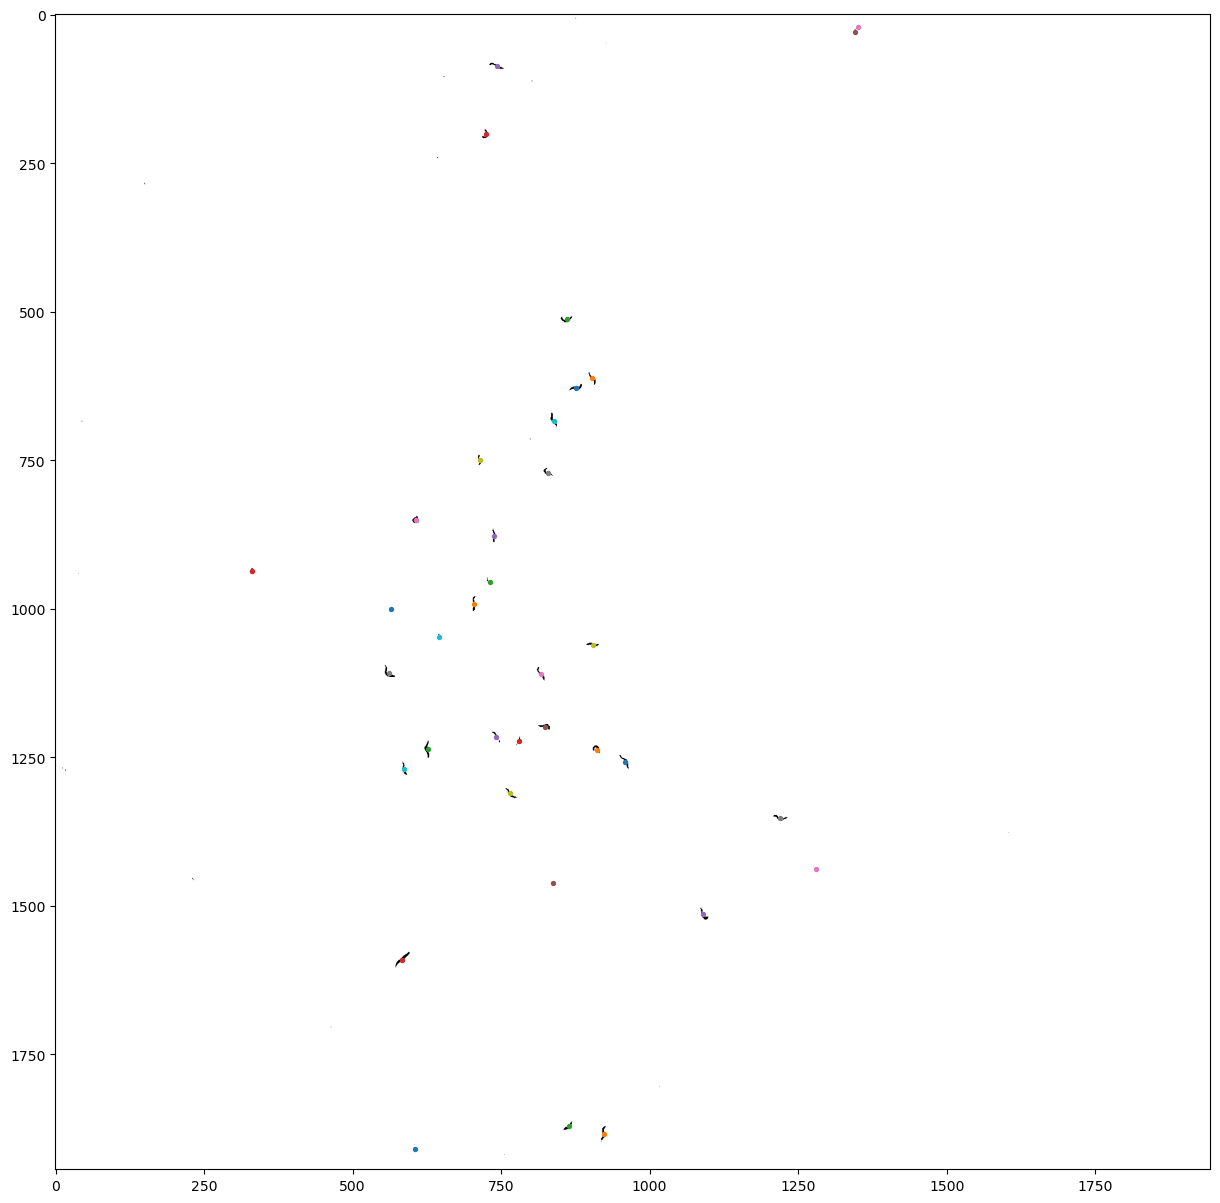

In [35]:
fig=plt.figure(figsize=(15,15))
img=images["1"]['frame'][0].max(2)-sumarray/max(np.asarray(list(images.keys()))[:-1].astype(int))
img=np.vectorize(lambda x: 0 if x <30 else 1)(img)
img=img*255
img=np.array(img, np.uint8)
plt.imshow(img,cmap='Greys')
for cnt in contours:
    if len(cnt)>10:
        x,y=np.average(cnt[:,0],axis=0)
        plt.scatter(x,y,s=8)

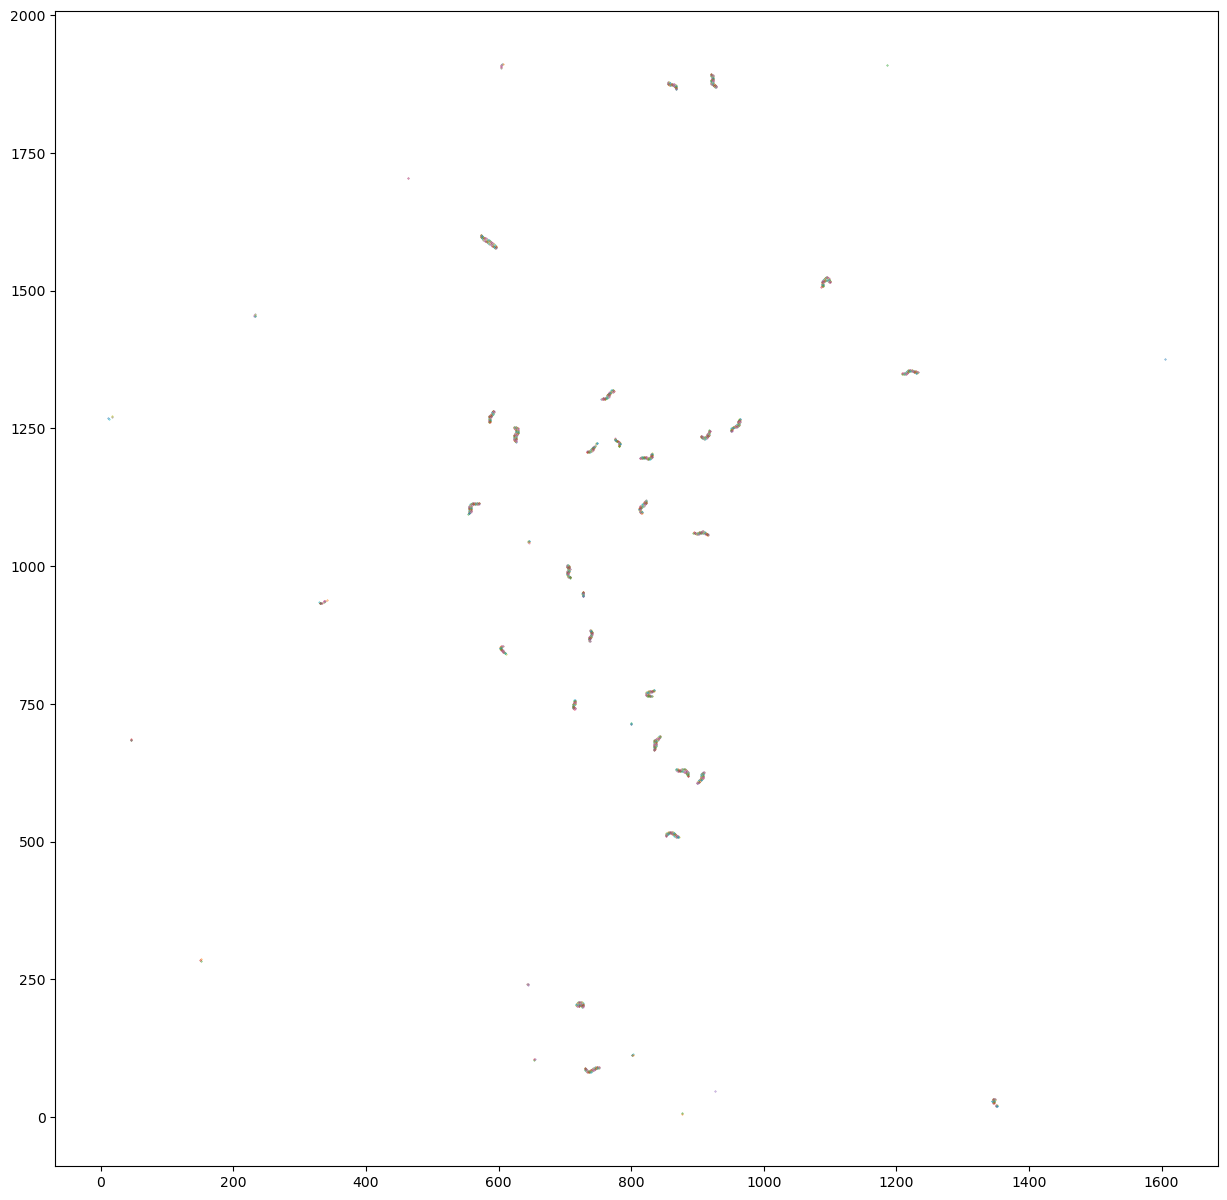

In [41]:
fig=plt.figure(figsize=(15,15))
for cnt in contours:
    for point in cnt:
        plt.scatter(point[0,0],point[0,1],s=0.1)

In [ ]:

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)






